In [1]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
sys.path.append('../utils')
import operator_calculations as op_calc
import stats

In [2]:
#change path to where 'manuscript_data' is saved
dir_path = '/Users/costa/Repositories/max_pred_states_repo+data/manuscript_data/'

In [3]:
f = h5py.File(dir_path+'Lorenz/simulation/simulation.h5','r')
sim = np.array(f['simulation'])
T = np.array(f['MetaData/T'])[0]
discard_t = np.array(f['MetaData/discarded_t'])[0]
dt = np.array(f['MetaData/integration_step'])[0]
f.close()

In [5]:
K=12
n_clusters=3162
delay=10
f = h5py.File(dir_path+'Lorenz/sims_from_partition/sims_delay_{}_K_{}_N_{}.h5'.format(delay,K,n_clusters),'r')
twindow = np.array(f['MetaData/twindow'],dtype=int)[0]
sims = np.array(f['sims'])
data_segs = np.array(f['data_segs'])
data_segs_all =  np.array(f['data_segs_all'])
f.close()

In [7]:
h_Sprott = 0.90563
lyap_time = 1/h_Sprott

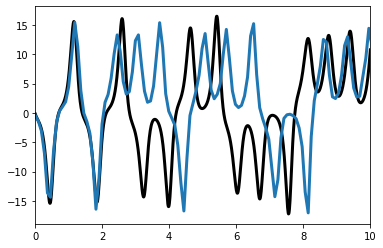

In [8]:
np.random.seed(200)
random_idx = np.random.randint(len(sims))
plt.plot(np.arange(0,twindow)*dt/lyap_time,data_segs_all[random_idx,0],lw=3,c='k')
plt.plot(np.arange(0,twindow,delay)*dt/(lyap_time),sims[random_idx,0],lw=3)
plt.xlim(0,10)
plt.show()

In [9]:
errors = np.vstack([np.sqrt((sims[k,0]-data_segs[k,0])**2) for k in range(len(sims))])

eps_thresh = .5*(sim[:,0].max()-sim[:,0].min())
tpreds = np.zeros(len(errors))
for k in range(len(errors)):
    if errors[k].max()>eps_thresh:
        tpreds[k] = np.arange(len(errors[k]))[errors[k]>eps_thresh][0]
    else:
        tpreds[k] = len(errors[k])

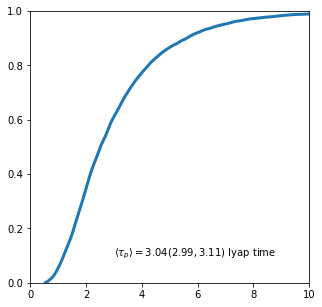

In [10]:
mean_tpred,cil_tpred,ciu_tpred = stats.bootstrap(tpreds*dt*delay/lyap_time,n_times=100)
plt.figure(figsize=(5,5))
x,y = stats.cumulative_dist(tpreds*dt*delay/lyap_time,(0,100))
y = np.array([np.mean(y[x==x_unique]) for x_unique in np.unique(x)])
x = np.sort(np.unique(x))
plt.plot(x,y,lw=3)
plt.xlim(0.,10)
plt.ylim(0,1)
plt.text(3,.1,r'$\langle\tau_p\rangle = {:.2f} ({:.2f},{:.2f})$ lyap time'.format(mean_tpred,cil_tpred[0],ciu_tpred[0]))
plt.show()